In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# In AAPL.ipynb
from stock_data import StockData
# Make plots a bit nicer
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (12, 6)


## Load or download a data (META)

In [2]:
# ============================================
# Download META daily data for a year
# ============================================

ticker = "META"

stock = StockData(ticker, start_date="2009-02-14", end_date="2020-06-03")

df = stock.load_data()
df.head()

C:\Users\Birhanu Matebe\Downloads\KAIM\Finanicial-Data-Analysis\Financial-Data-Analysis\src\stock_data.py:31: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.df = yf.download(


Price,Close,High,Low,Open,Volume
Ticker,META,META,META,META,META
Date,,,,,
2012-05-18,37.995766,44.724287,37.767175,41.792360,573576400
2012-05-21,33.821495,36.435382,32.797807,36.306177,168192700
2012-05-22,30.810064,33.384196,30.750432,32.410201,101786600
2012-05-23,31.803940,32.300876,31.167862,31.177801,73600000
2012-05-24,32.827629,33.006527,31.575351,32.748121,50237200


# 1. Data profiling

In [3]:
# ============================================
# Clean the columns (handle MultiIndex case)
# ============================================

# If columns are MultiIndex (like: ('Close', 'AMZN')), flatten them
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)  # keep only first level: Open, High, etc.

print("Cleaned columns:", df.columns.tolist())

# Optional: add a Ticker column (useful if using multiple tickers later)
df["Ticker"] = ticker

# Ensure index is datetime and sorted
df.index = pd.to_datetime(df.index)
df = df.sort_index()




Cleaned columns: ['Close', 'High', 'Low', 'Open', 'Volume']


# - Summary Statistics 

In [4]:


stock.inspect_data()


📌 Dataset Shape for META: (2022, 6)

📌 First 5 rows:


Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2012-05-18,37.995766,44.724287,37.767175,41.792360,573576400,META
2012-05-21,33.821495,36.435382,32.797807,36.306177,168192700,META
2012-05-22,30.810064,33.384196,30.750432,32.410201,101786600,META
2012-05-23,31.803940,32.300876,31.167862,31.177801,73600000,META
2012-05-24,32.827629,33.006527,31.575351,32.748121,50237200,META



📌 Last 5 rows:


Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2020-05-27,227.736084,229.147382,219.775166,227.666521,34697600,META
2020-05-28,224.078629,230.210824,222.627567,222.925732,29377200,META
2020-05-29,223.710892,226.096196,221.514441,223.820218,23241500,META
2020-06-01,230.489105,231.015857,222.130629,223.213947,18223800,META
2020-06-02,231.294128,231.572412,225.171867,229.525036,20919000,META



📌 Random 5 rows:


Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2015-09-01,86.695549,88.842311,85.970018,86.317872,36097400,META
2012-07-16,28.076916,30.313130,28.037160,30.313130,24672100,META
2015-01-26,77.025162,77.989220,76.816449,77.502224,19260800,META
2014-06-19,63.945793,65.178201,63.816592,65.058934,34245000,META
2016-04-26,108.093636,109.822973,107.487372,109.813032,22521500,META



📌 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2022 entries, 2012-05-18 to 2020-06-02
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2022 non-null   float64
 1   High    2022 non-null   float64
 2   Low     2022 non-null   float64
 3   Open    2022 non-null   float64
 4   Volume  2022 non-null   int64  
 5   Ticker  2022 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 110.6+ KB


In [5]:
# check if a null value exists


key_cols = ['Close', 'Open', 'High', 'Volume', 'Ticker']


stock.check_missing_values()


📌 Missing values per column:
Price
Close     0
High      0
Low       0
Open      0
Volume    0
Ticker    0
dtype: int64

📌 Columns with >5% missing values:
✔️ None

📌 Total rows with missing values in key columns ['Close', 'Open', 'High', 'Volume']: 0
✔️ No missing rows in key columns

📌 Duplicate rows: 0

📌 Cardinality (categoricals): {'Ticker': 1}


In [6]:
# log statistical data values
print("The description of the numeric columns:")
print(df.describe())

The description of the numeric columns:
Price        Close         High          Low         Open        Volume
count  2022.000000  2022.000000  2022.000000  2022.000000  2.022000e+03
mean    113.411263   114.631446   112.071211   113.373597  3.286328e+07
std      58.568790    59.047253    57.963821    58.498908  2.933772e+07
min      17.621368    18.158061    17.442471    17.969224  5.913100e+06
25%      65.896271    66.798206    64.758293    65.558356  1.619765e+07
50%     115.304188   116.775120   113.629511   115.423447  2.398350e+07
75%     169.179554   170.792101   167.296164   169.040413  3.932495e+07
max     233.470734   239.424021   230.250577   238.300955  5.735764e+08


In [7]:
#Overview of categorical columns
print("The description of the categorical columns:")
print(df.describe(include=['object']))

The description of the categorical columns:
Price  Ticker
count    2022
unique      1
top      META
freq     2022


In [8]:
# log and check the frequency, and uniqueness of all dataset column
print("The description of all columns:")
print(df.describe(include='all'))


The description of all columns:
Price         Close         High          Low         Open        Volume  \
count   2022.000000  2022.000000  2022.000000  2022.000000  2.022000e+03   
unique          NaN          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN          NaN           NaN   
mean     113.411263   114.631446   112.071211   113.373597  3.286328e+07   
std       58.568790    59.047253    57.963821    58.498908  2.933772e+07   
min       17.621368    18.158061    17.442471    17.969224  5.913100e+06   
25%       65.896271    66.798206    64.758293    65.558356  1.619765e+07   
50%      115.304188   116.775120   113.629511   115.423447  2.398350e+07   
75%      169.179554   170.792101   167.296164   169.040413  3.932495e+07   
max      233.470734   239.424021   230.250577   238.300955  5.735764e+08   

Price  Ticker  
count    2022  
unique      1  
top    

In [9]:
#check if duplication of rows exist
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

Duplicate rows: 0


In [10]:
# Cardinality (uniqueness) for categoricals
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
cardinality = {c: df[c].nunique() for c in cat_cols}
print("Cardinality (categoricals):", cardinality)

Cardinality (categoricals): {'Ticker': 1}


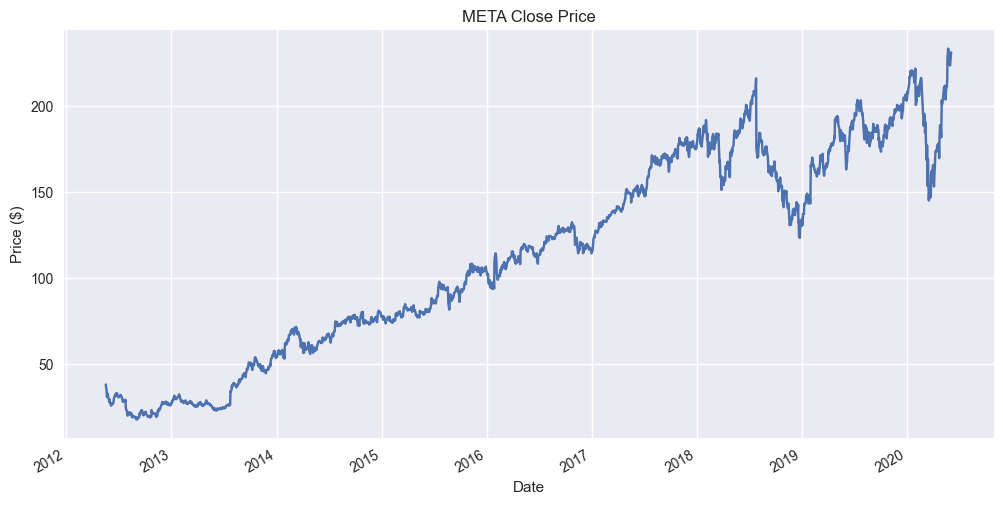

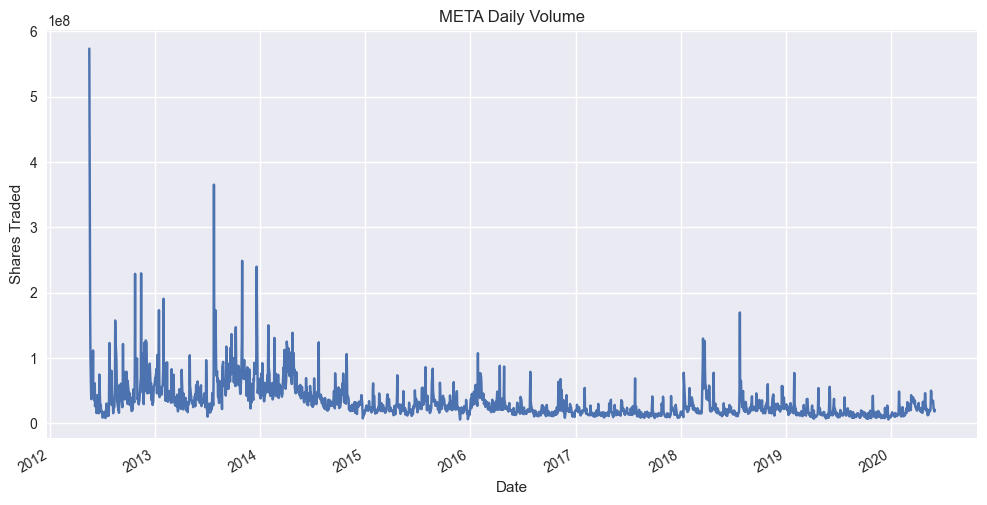

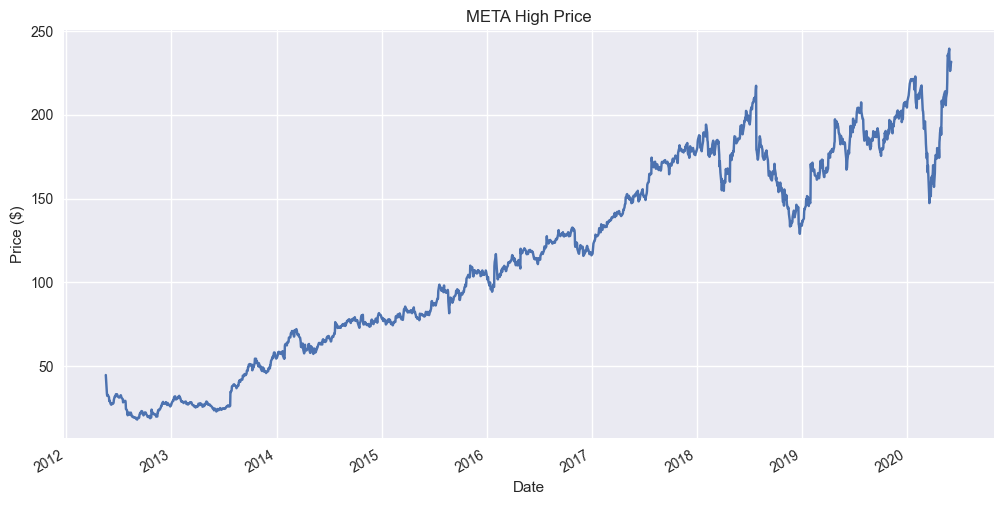

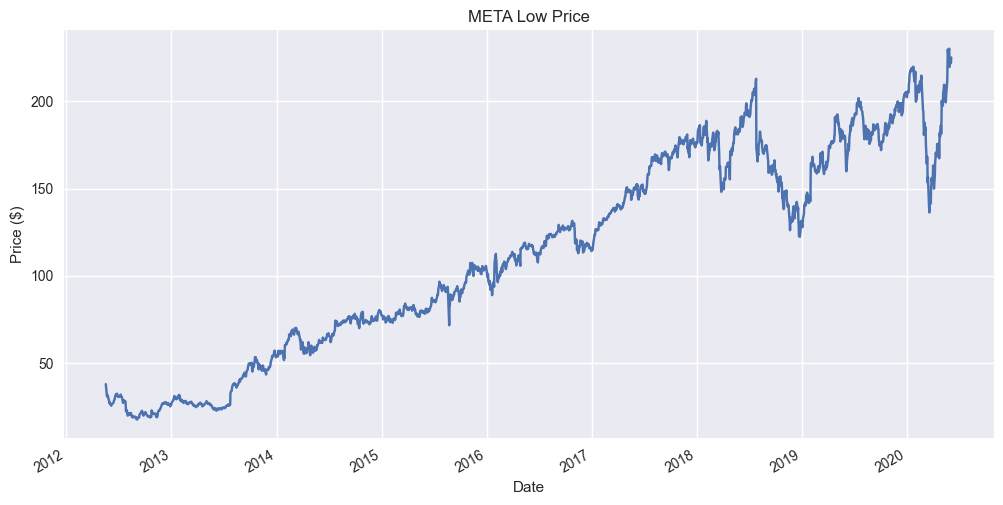

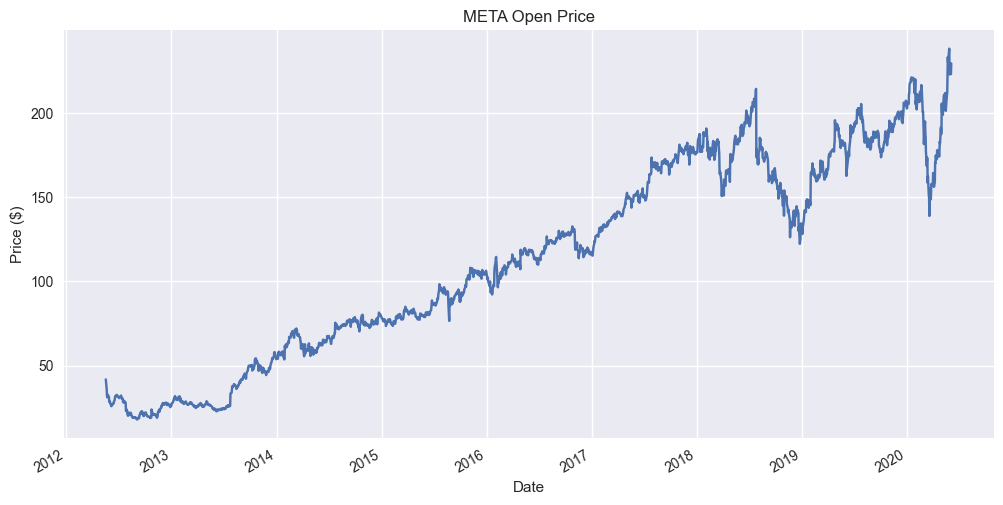

In [11]:

stock.plot_price()

## Stock price over time

## Interpretation of Meta Platforms (META) Price History (2012–2024)
- Initial Struggle (2012–2013): The stock experienced high volatility and an initial drop, consolidating near the $25 level following its IPO.

- Massive Bull Run (2013–Mid-2018): Following the initial phase, the stock began a strong and consistent upward trend, climbing from $\sim\$25$ to a peak near $215.

- Severe Correction (Late 2018): The stock suffered a substantial and rapid correction, dropping significantly from its high down to the $\mathbf{\$125}$ range. This was the largest proportional correction among the major tech stocks in this period.

- Strong Recovery (2019–2020): The price quickly recovered from the 2018 drop, climbing back toward new highs and finishing near the $\mathbf{\$210}$ level.

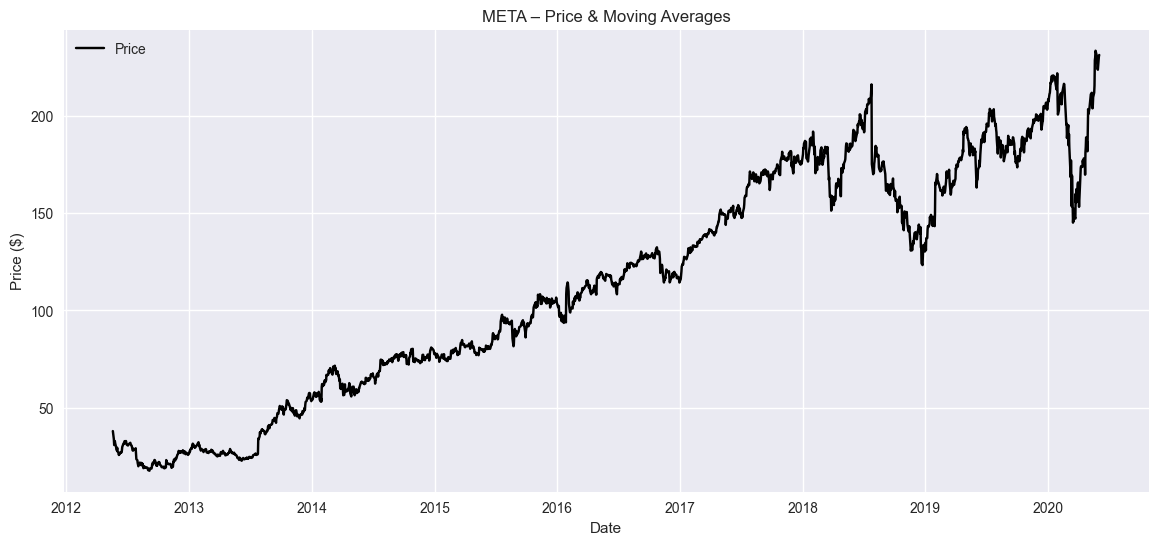

In [12]:
stock.plot_price_sma()


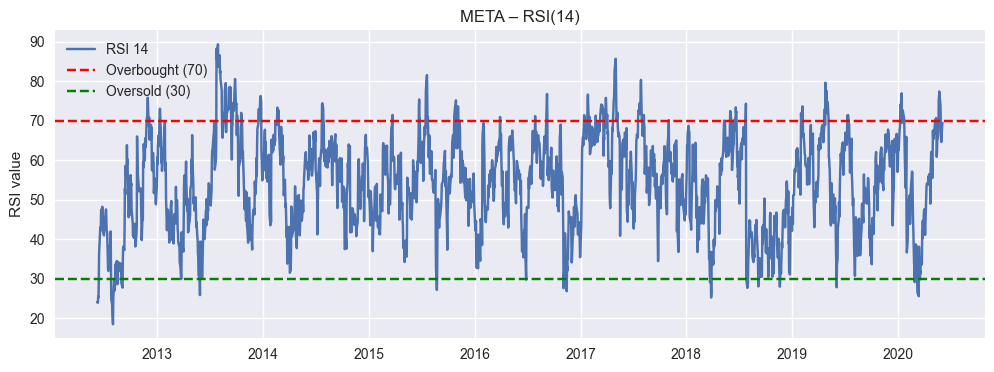

In [13]:



stock.plot_rsi()



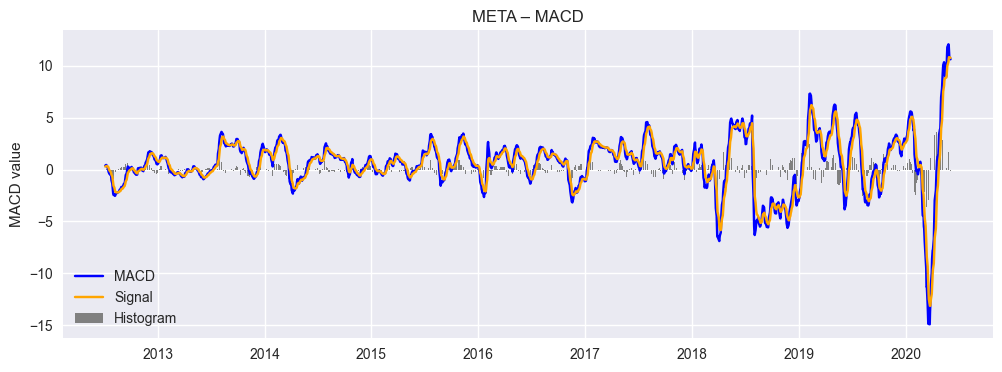

In [14]:
stock.plot_macd()


## Interpretation of Meta Platforms (META) Moving average
- Initial Recovery (2012–2013): The stock settled from post-IPO volatility, consolidating near the $25 mark before starting its major climb.

- Massive Bull Run (2013–Mid-2018): A powerful and sustained upward trend took the price from the $25 level to its peak near $215.

- Severe Drop (Late 2018): The price experienced a sharp and significant correction, dropping almost 40% from its high down to the $125 range.

- Final Recovery (2019–2020): The stock successfully rebounded, climbing back near its all-time highs and finishing the period strong.

## Interpretation of Meta Platforms (META) Relative Strength Index (RSI 14)
- RSI Core: The indicator confirms momentum, with readings above 70 (Overbought) and below 30 (Oversold) signaling potential price extremes.

- High Volatility Momentum: The META RSI is highly volatile, constantly swinging back and forth across the 50 centerline. This reflects the dramatic price swings and investor uncertainty seen in the price chart, especially around 2018.

- Frequent Overbought Readings: The RSI frequently spikes above 70, confirming the stock's many periods of rapid, high-momentum rallies.

- Oversold Signals (The 2018 Event): The most significant feature is the sharp and deep dip below the 30 (Oversold) line in late 2018. This deep oversold reading aligned perfectly with the stock's major price correction, confirming that the selling panic was extreme on a technical momentum basis.

## Interpretation of Meta Platforms (META) MACD

- Overall Bullish Trend: The MACD Line (Blue) spends the majority of its time above the zero line from 2013 onwards. This consistently confirms the strong, long-term bullish trend of the stock.

- High Momentum Volatility: The MACD exhibits very large and sharp swings (oscillations) around the zero line, especially from 2018 onward. This confirms the high volatility seen in the META price chart (rallies followed by dramatic drops).

- Key Correction Signal (Late 2018): The chart shows the largest and deepest negative spike in late 2018 (dropping to $\sim-8$ to $\sim-10$ value). This extreme bearish reading strongly confirmed the severe panic-selling and correction that occurred in the stock's price at that time.

- Rally Confirmation: The sharp, large positive spikes (e.g., in late 2019/early 2020) show intense buying pressure, validating the stock's ability to mount strong, high-momentum recoveries.
